In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.10264281 0.01476487 0.05175839 ... 0.13181893 0.17655744 0.07007373]
 [0.18083871 0.02601312 0.09118924 ... 0.23224195 0.31106338 0.12345768]
 [0.03460074 0.00497721 0.01744768 ... 0.04443597 0.05951725 0.02362175]
 ...
 [0.19478228 0.02801886 0.09822039 ... 0.25014896 0.33504793 0.13297688]
 [0.18131549 0.0260817  0.09142966 ... 0.23285425 0.3118835  0.12378317]
 [0.01055747 0.00151866 0.00532368 ... 0.01355842 0.01816006 0.00720753]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.00422066  0.21153028  0.06010272 ...  0.21404265  0.17577045
   0.03728365]
 [ 0.10136012 -0.06421656  0.22997044 ...  0.27354002  0.39821172
   0.09342566]
 [ 0.06328461 -0.13757287  0.12028556 ... -0.16832537  0.25027905
   0.1343545 ]
 ...
 [ 0.04836237 -0.11069574 -0.01273401 ...  0.3128043   0.59201921
   0.16397437]
 [ 0.25745413 -0.13926727  0.26778996 ...  0.08625145  0.32431885
   0.19155726]
 [-0.03131898 -0.07281977 -0.03194115 ... -0.05639279  0.05864907
   0.11

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])

print(mycebmf.F[:,1])

tensor([ 0.2278, -0.0034,  0.3611, -0.0307, -0.2668,  0.2387, -0.1440,  0.0462,
         0.0590, -0.4228,  0.0626,  0.2886,  0.0888, -0.1490, -0.0648,  0.0793,
        -0.2448, -0.2590,  0.0938,  0.0488,  0.2284,  0.0614,  0.1965, -0.1036,
         0.1913,  0.0598, -0.1077, -0.0228, -0.1876, -0.1148,  0.1590,  0.1172,
         0.0252,  0.0348,  0.0192, -0.0528,  0.0760, -0.1966, -0.0115, -0.1773,
        -0.3010,  0.0195, -0.0696, -0.1914, -0.0928, -0.2792,  0.2444,  0.2169,
         0.4231,  0.0419])
tensor([ 0.1475, -0.3069,  0.3127, -0.0741, -0.1410,  0.0791, -0.0882, -0.0015,
        -0.2112, -0.2629, -0.0176,  0.1730,  0.1543,  0.1712, -0.0770,  0.1302,
        -0.1382, -0.0542, -0.0348, -0.1672,  0.0666,  0.1352,  0.2610, -0.2324,
        -0.1330,  0.1991, -0.0272,  0.0500, -0.2160, -0.0332, -0.0635,  0.2126,
        -0.1322,  0.0026,  0.0143,  0.1630, -0.1287, -0.1825,  0.2675,  0.0869])


In [6]:
sum(torch.outer(mycebmf.L[:,k], mycebmf.F[:,k]) for k in range(mycebmf.K))

tensor([[ 0.1242,  0.0435,  0.1376,  ...,  0.1295,  0.1894,  0.1056],
        [ 0.1228, -0.0089,  0.1364,  ...,  0.1639,  0.3491,  0.1121],
        [ 0.0581, -0.1271,  0.1505,  ..., -0.0442,  0.2082,  0.0511],
        ...,
        [ 0.2477, -0.0226,  0.1367,  ...,  0.2455,  0.4210,  0.1817],
        [ 0.2157, -0.0846,  0.2253,  ...,  0.1477,  0.4362,  0.1684],
        [ 0.0458,  0.0029,  0.0236,  ...,  0.0192, -0.0104,  0.0180]])

In [7]:
 mycebmf.L @  mycebmf.F.T

tensor([[ 0.1242,  0.0435,  0.1376,  ...,  0.1295,  0.1894,  0.1056],
        [ 0.1228, -0.0089,  0.1364,  ...,  0.1639,  0.3491,  0.1121],
        [ 0.0581, -0.1271,  0.1505,  ..., -0.0442,  0.2082,  0.0511],
        ...,
        [ 0.2477, -0.0226,  0.1367,  ...,  0.2455,  0.4210,  0.1817],
        [ 0.2157, -0.0846,  0.2253,  ...,  0.1477,  0.4362,  0.1684],
        [ 0.0458,  0.0029,  0.0236,  ...,  0.0192, -0.0104,  0.0180]])

In [8]:

k=0
f_o=mycebmf.F[:,k]
l_o=mycebmf.L[:,k]
R= noisy_matrix- mycebmf.L@mycebmf.F.T
Rk= mycebmf._partial_residual_masked(k)

print(Rk)


sum( torch.outer(mycebmf.L[:,k], mycebmf.F[:,k])   for k in range(mycebmf.K))

tensor([[-3.3921e-02,  1.9064e-01, -2.7212e-02,  ...,  2.1467e-01,
          1.6744e-01,  8.0237e-03],
        [ 1.5202e-01, -1.3800e-02,  1.8582e-01,  ...,  3.4847e-01,
          3.8143e-01,  1.2151e-01],
        [ 4.8726e-02, -4.3660e-05, -7.0234e-03,  ..., -6.4203e-02,
          1.2544e-01,  1.1838e-01],
        ...,
        [-1.3299e-02, -4.3504e-02, -5.0455e-02,  ...,  3.2348e-01,
          5.2751e-01,  1.3264e-01],
        [ 2.0837e-01, -1.4742e-02,  1.3108e-01,  ...,  1.6791e-01,
          2.0722e-01,  1.5781e-01],
        [-6.9013e-02, -7.3798e-02, -5.1181e-02,  ..., -6.4404e-02,
          8.4640e-02,  9.8657e-02]])


tensor([[ 0.1242,  0.0435,  0.1376,  ...,  0.1295,  0.1894,  0.1056],
        [ 0.1228, -0.0089,  0.1364,  ...,  0.1639,  0.3491,  0.1121],
        [ 0.0581, -0.1271,  0.1505,  ..., -0.0442,  0.2082,  0.0511],
        ...,
        [ 0.2477, -0.0226,  0.1367,  ...,  0.2455,  0.4210,  0.1817],
        [ 0.2157, -0.0846,  0.2253,  ...,  0.1477,  0.4362,  0.1684],
        [ 0.0458,  0.0029,  0.0236,  ...,  0.0192, -0.0104,  0.0180]])

In [9]:
import torch

k = 0
Y0   = mycebmf.Y0
M    = mycebmf.mask
L    = mycebmf.L
F    = mycebmf.F

# Clone these to avoid view aliasing issues
l_old = L[:, k].clone()
f_old = F[:, k].clone()

# Baseline residual (masked)
recon = L @ F.T
R     = (Y0 - recon) * M

# Partial residual excluding factor k
Rk = (Y0 - (recon - torch.outer(l_old, f_old))) * M

# 1) First identity: Rk = R + l_old f_old^T  (masked)
print(torch.allclose(Rk, R + torch.outer(l_old, f_old) * M, atol=1e-7))

# Mutate L[:,k] --> l_new
L[:, k] = l_old + 1.0
l_new = L[:, k]  # (this is fine; we already saved l_old above)

# New residual (recompute from scratch, masked)
recon_new = L @ F.T
R_new     = (Y0 - recon_new) * M

# 2) Second identity: R_new = Rk - l_new f_old^T  (masked)
print(torch.allclose(R_new, Rk - torch.outer(l_new, f_old) * M, atol=1e-7))


True
False


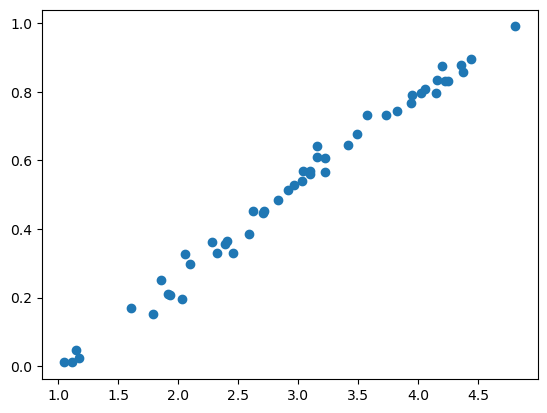

In [10]:
plt.scatter( mycebmf.L[:,0],u)

In [11]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[ 0.1426,  0.0106,  0.0848,  ...,  0.1433,  0.1920,  0.0940],
        [ 0.1014,  0.0191,  0.1414,  ...,  0.1766,  0.3385,  0.1205],
        [ 0.0592, -0.0955,  0.1241,  ..., -0.0012,  0.1576,  0.0459],
        ...,
        [ 0.2160, -0.0057,  0.1357,  ...,  0.2418,  0.3894,  0.1600],
        [ 0.2047, -0.0743,  0.1998,  ...,  0.1730,  0.3975,  0.1513],
        [ 0.0234,  0.0077,  0.0149,  ...,  0.0080,  0.0018,  0.0053]])

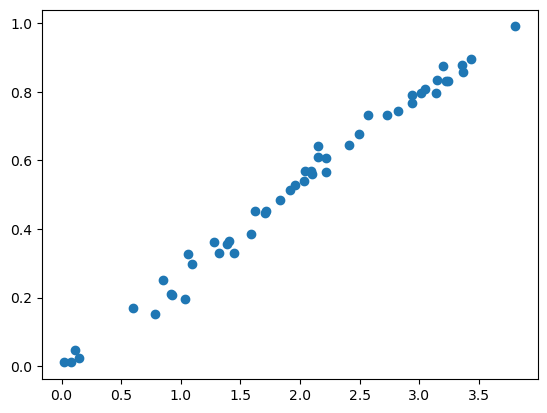

In [12]:
plt.scatter( mycebmf.L[:,0],u)

5


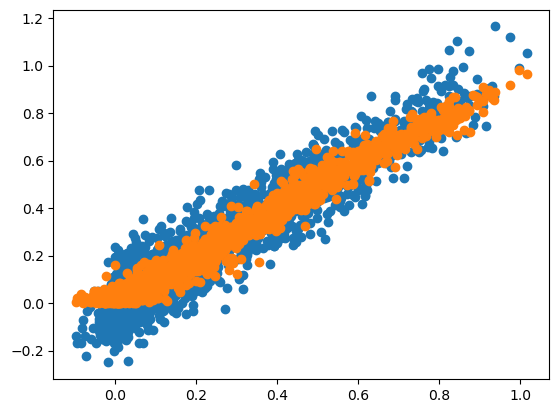

In [13]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [14]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 
mycebmf.initialize()
mycebmf.fit()

5
5
5
5
3
3
3


CEBMFResult(L=tensor([[1.7092],
        [3.1411],
        [0.7842],
        [0.1274],
        [1.9568],
        [0.6010],
        [3.2441],
        [2.8215],
        [3.0499],
        [1.0547],
        [1.3228],
        [3.4366],
        [1.8274],
        [3.2221],
        [1.7038],
        [0.9252],
        [2.9389],
        [2.1475],
        [1.5861],
        [2.2198],
        [2.9387],
        [2.1482],
        [2.2187],
        [2.4897],
        [0.0705],
        [2.7307],
        [3.1974],
        [2.0949],
        [1.3831],
        [3.1507],
        [1.6177],
        [2.0276],
        [3.3538],
        [2.4095],
        [1.0302],
        [2.0922],
        [0.8478],
        [1.4478],
        [0.0236],
        [2.0380],
        [1.2767],
        [1.3992],
        [0.9131],
        [2.5668],
        [3.8033],
        [1.9110],
        [1.0919],
        [3.3702],
        [3.0169],
        [0.1016]]), F=tensor([[0.0549],
        [0.0109],
        [0.0290],
        [0.2068],
        [0

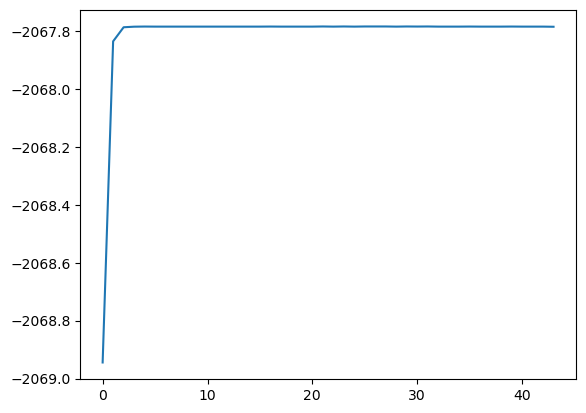

In [15]:
plt.plot(mycebmf.obj)

In [ ]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                      prior_L="point_laplace") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
5
5
5
4
4
4
3
3
3
2
2
2
2
2
2
5
5
5
4
3
2
5
5
5
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
4
4
3
3
3
2
5
5
5
4
4
4
3
2
2
5
5
5
4
3
3
3
3


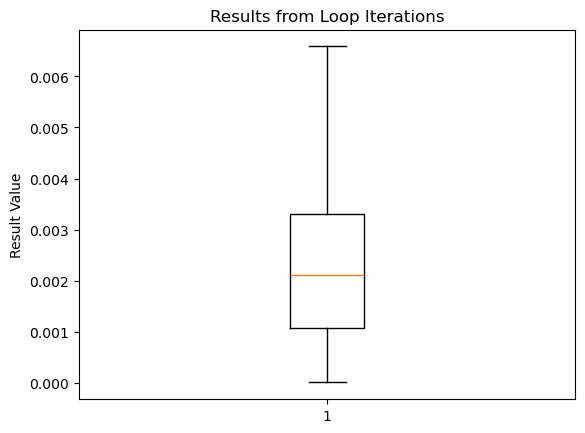

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

0.00236293612052501